In [1]:
#%load_ext autoreload
#%autoreload 2

from sindy_bvp import SINDyBVP
from sindy_bvp.differentiators import FiniteDifferences

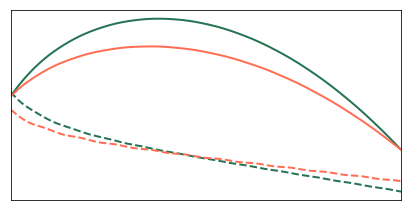

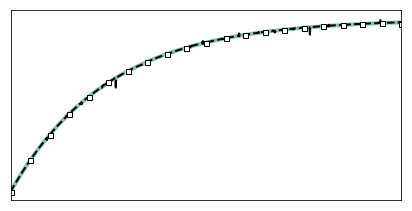

Learned function for d^{2}u/dx^{2} includes: ['du/dx', 'f']
L2 p error: 0.0021
L2 q error: nan
CPU times: user 2.78 s, sys: 653 ms, total: 3.43 s
Wall time: 2.74 s


/home/jovyan/work/SINDy-BVP/sindy_bvp/analysis/plotter.py:398: RuntimeWarning: invalid value encountered in double_scalars
  q_error = q_error/np.linalg.norm(self.q_x[idcs])


In [2]:
%%time

outcome_var = 'd^{2}u/dx^{2}'

# Known Operator Case
sbvp_ko = SINDyBVP(file_stem = "./data/S3-P2-",
                num_trials = 2,
                differentiator = FiniteDifferences(diff_order = 2),
                outcome_var = outcome_var,
                noisemaker = None,
                known_vars = ['du/dx', 'f'],
                dep_var_name = 'u',
                ind_var_name = 'x')

coeffs, plotter = sbvp_ko.sindy_bvp()

# Generate the analysis plots: ODE solutions (first 3), p(x) and q(x), and u_xx model coefficients (entries in Xi)
plotter.generate_analysis_plots(save_stem='3c-KO')

print("Learned function for", outcome_var ,"includes:", list(coeffs))

# Score coefficients
plotter.score_coefficients()

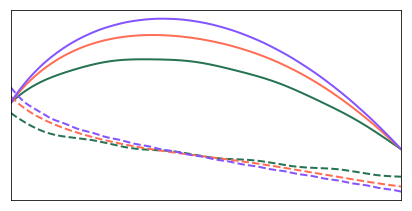

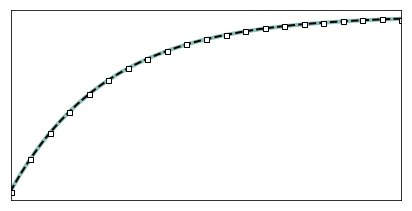

Learned function for d^{2}u/dx^{2} includes: ['du/dx', 'f']
L2 p error: 0.0004
L2 q error: nan
CPU times: user 35.2 s, sys: 35.7 s, total: 1min 10s
Wall time: 33.7 s


/home/jovyan/work/SINDy-BVP/sindy_bvp/analysis/plotter.py:398: RuntimeWarning: invalid value encountered in double_scalars
  q_error = q_error/np.linalg.norm(self.q_x[idcs])


In [3]:
%%time

# Unknown Operator Case
sbvp_uo = SINDyBVP(file_stem = "./data/S3-P2-",
                num_trials = 8,
                differentiator = FiniteDifferences(diff_order = 2),
                outcome_var = outcome_var,
                noisemaker = None,
                known_vars = None,
                dep_var_name = 'u',
                ind_var_name = 'x')

coeffs, plotter = sbvp_uo.sindy_bvp()

# Generate the analysis plots: ODE solutions (first 3), p(x) and q(x), and u_xx model coefficients (entries in Xi)
plotter.generate_analysis_plots(save_stem='3c-UO')

print("Learned function for", outcome_var ,"includes:", list(coeffs))

# Score coefficients
plotter.score_coefficients()